using sklearn digits dataset to classify handwritten digits usimg randpom forests

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [8]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

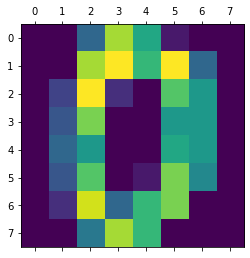

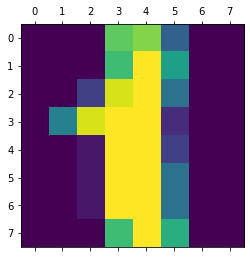

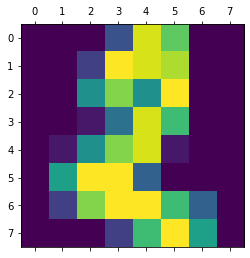

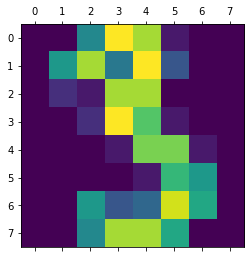

In [9]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.matshow(digits.images[i])

In [11]:
df = pd.DataFrame(digits.data)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [14]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [18]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(['target'],axis = 'columns'),digits.target,test_size = 0.2)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [25]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [26]:
rf.score(xtest,ytest)
#98%

0.9861111111111112

In [27]:
ypred = rf.predict(xtest)


In [28]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(ytest,ypred)

In [29]:
cn

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]])

Text(33.0, 0.5, 'pred')

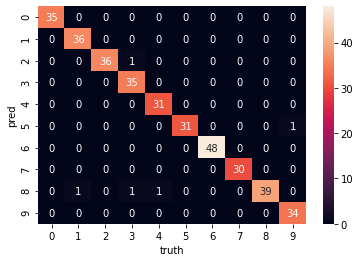

In [32]:
import seaborn as sns
sns.heatmap(cn,annot = True)
plt.xlabel("truth")
plt.ylabel("pred")